In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('./datasets/Mall_Customers.csv')

c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#1. zrób one-hot encoding na kolumnie Genere
temp = pd.get_dummies(df.Genre, prefix='is')
#2. dodaj do df nową kolumnę "is_male"
df['Is male']=temp['is_Male']
#3. usuń niepotrzebne kolumny z df
df.drop(['CustomerID','Genre'], axis=1, inplace=True)
print(df)

     Age  Annual Income (k$)  Spending Score (1-100)  Is male
0     19                  15                      39     True
1     21                  15                      81     True
2     20                  16                       6    False
3     23                  16                      77    False
4     31                  17                      40    False
..   ...                 ...                     ...      ...
195   35                 120                      79    False
196   45                 126                      28    False
197   32                 126                      74     True
198   32                 137                      18     True
199   30                 137                      83     True

[200 rows x 4 columns]


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

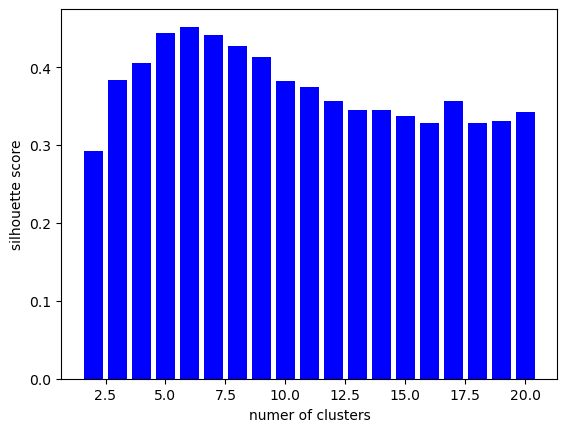

In [3]:
# sprawdzenie silhouette_score dla różnej liczby klastrów

from sklearn.metrics import silhouette_score

def get_kmeans_score(data, k):
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(data)
    labels = model.predict(data)
    return silhouette_score(data, model.labels_, metric='euclidean'), labels

results = []
k_list = list(range(2,21))

for k in k_list:
    results.append(get_kmeans_score(df, k)[0])


plt.bar(k_list, results, color='b')
plt.xlabel('numer of clusters')
plt.ylabel('silhouette score')
plt.show()


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 0, 'Spending Score')

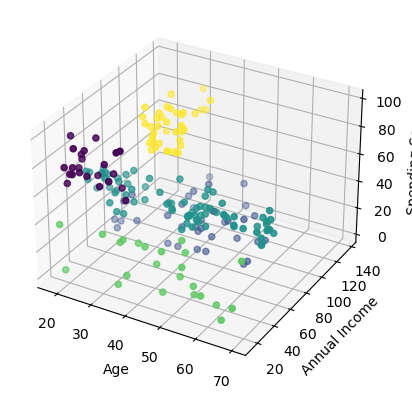

In [4]:
#wyświetl wykres 3D dla wybranej (wyznaczonej) liczby klastrów
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], c=get_kmeans_score(df, 5)[1])

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

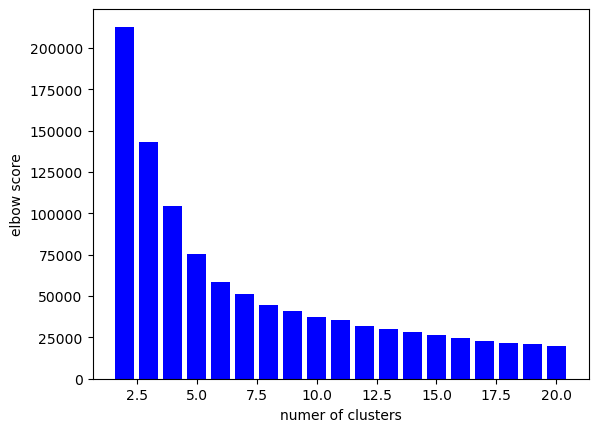

In [8]:
#Teraz policz to samo dla metody łokciowej. 
#Funkcja wygląda tak samo, poza jedną różnicą: return abs(model.score(data)) 

def get_kmeans_score(data, k):
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(data)
    return abs(model.score(data))

results = []
k_list = list(range(2,21))

for k in k_list:
    results.append(get_kmeans_score(df, k))

plt.bar(k_list, results, color='b')
plt.xlabel('numer of clusters')
plt.ylabel('elbow score')
plt.show()


In [6]:
#wyświetl wykres 3D dla wybranej (wyznaczonej) liczby klastrów